In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')

In [16]:
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


#### It seems pretty much clean, there is no null values, no need for type conversion and other cleaning work

In [18]:
df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [19]:
df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [20]:
for i in df.columns:
    print(i,df[i].unique())

User ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 24

#### EDA

In [21]:
df1 = df.copy()
df1 = df1.drop('User ID',axis = 'columns')

In [22]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [23]:
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes!='O']
numerical_features


['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'User Behavior Class']

In [24]:
continous_features = [feature for feature in df1.columns if df1[feature].dtypes!="O" and df1[feature].nunique()>90]
continous_features

['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Data Usage (MB/day)']

In [25]:
discrete_feature = [feature for feature in df1.columns if df1[feature].dtypes!="O" and df1[feature].nunique()<90]
discrete_feature

['Number of Apps Installed', 'Age', 'User Behavior Class']

In [26]:
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes=='O']
categorical_features

['Device Model', 'Operating System', 'Gender']

## UNIVARIATE ANALYSIS

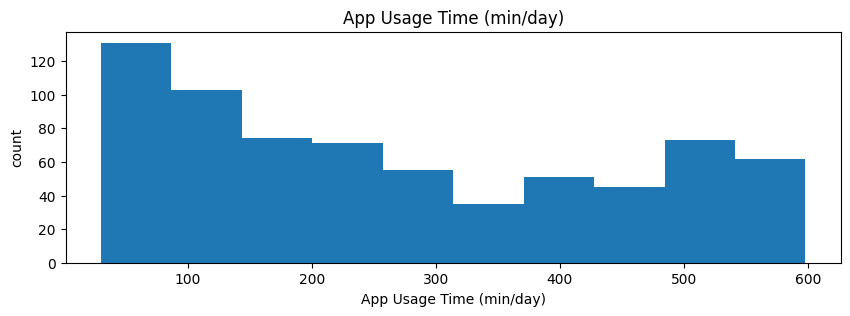

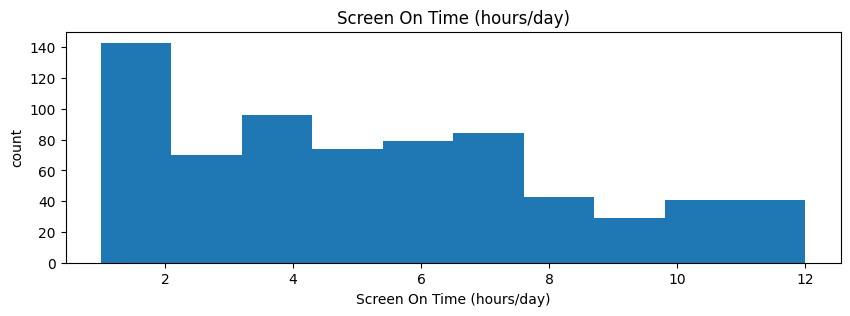

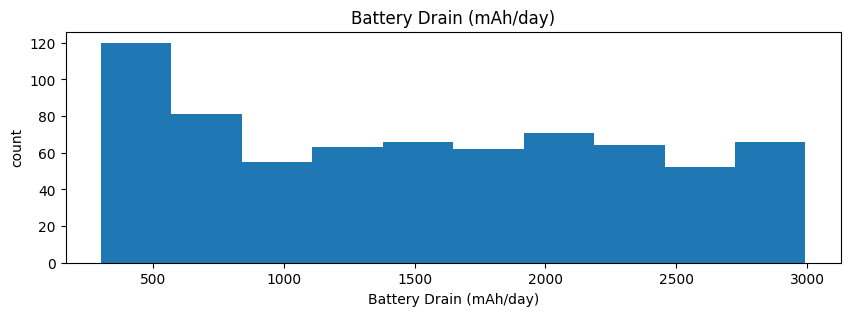

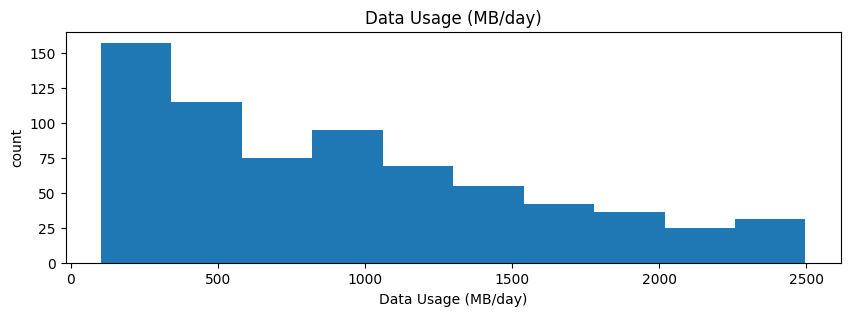

In [27]:
for i in continous_features:
    plt.figure(figsize=(10, 3))
    plt.hist(df[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

#### *Distribution of Numerical variables*

In [28]:
bar_plot_ = categorical_features + discrete_feature
print(bar_plot_)

['Device Model', 'Operating System', 'Gender', 'Number of Apps Installed', 'Age', 'User Behavior Class']


In [29]:
#discrete_feature 
categorical_features

['Device Model', 'Operating System', 'Gender']

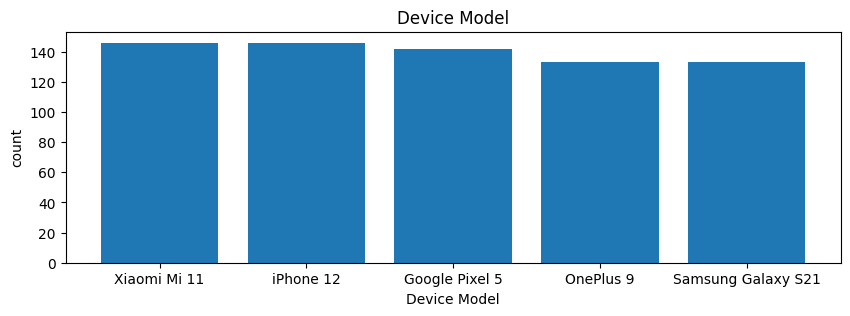

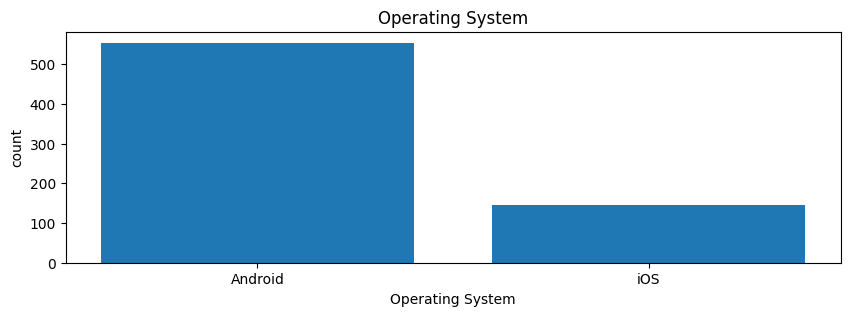

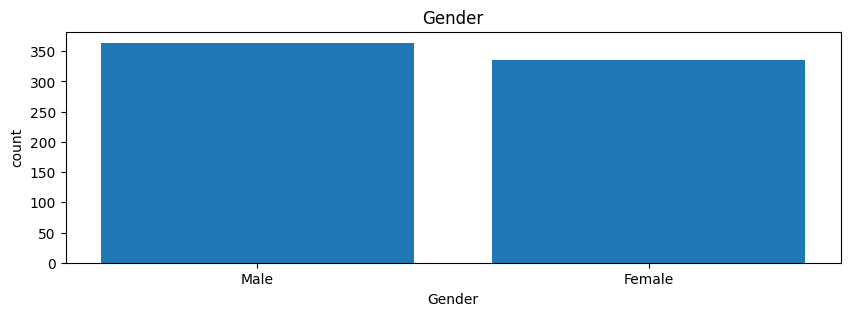

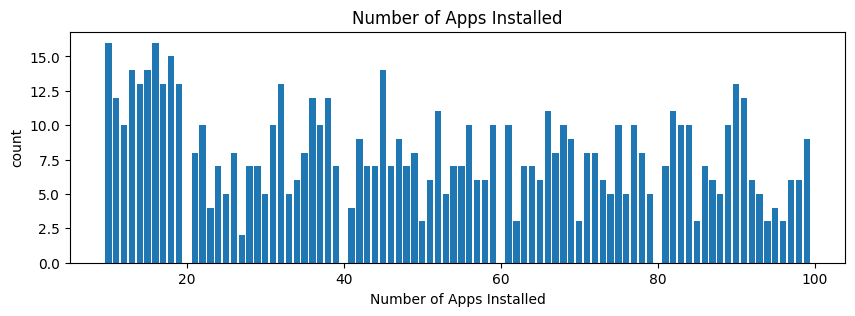

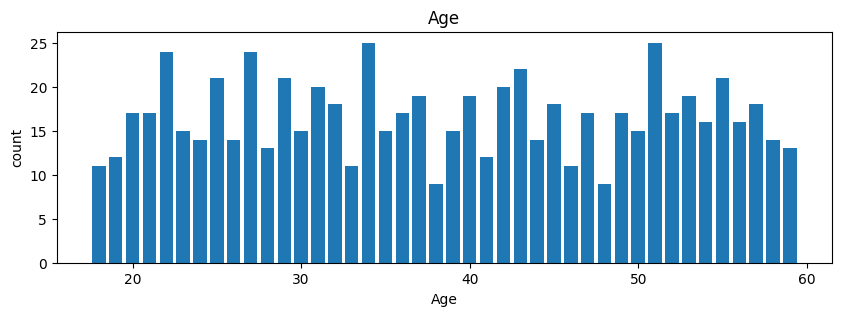

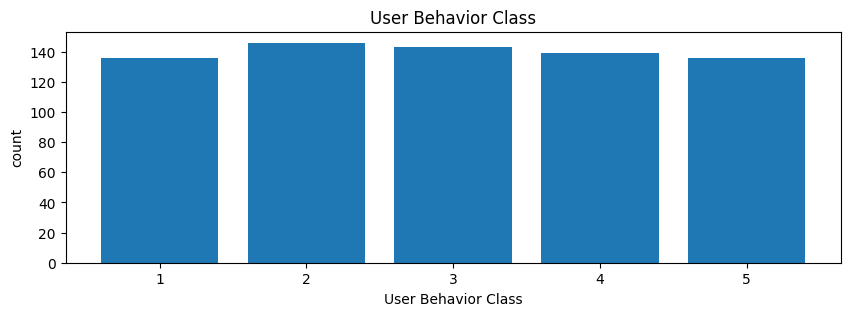

In [30]:
for i in bar_plot_:
    plt.figure(figsize = (10,3))
    plt.bar(df[i].value_counts().index,df[i].value_counts())
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

#### Distribution of categorical and discrete data 

In [31]:
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

In [32]:
for i in numerical_features:
    print(i,'mean :',df[i].mean(),'mode :',df[i].mode())

App Usage Time (min/day) mean : 271.12857142857143 mode : 0    64
Name: App Usage Time (min/day), dtype: int64
Screen On Time (hours/day) mean : 5.272714285714286 mode : 0    1.6
Name: Screen On Time (hours/day), dtype: float64
Battery Drain (mAh/day) mean : 1525.1585714285713 mode : 0    490
Name: Battery Drain (mAh/day), dtype: int64
Number of Apps Installed mean : 50.68142857142857 mode : 0    10
1    16
Name: Number of Apps Installed, dtype: int64
Data Usage (MB/day) mean : 929.7428571428571 mode : 0    122
1    284
Name: Data Usage (MB/day), dtype: int64
Age mean : 38.48285714285714 mode : 0    34
1    51
Name: Age, dtype: int64
User Behavior Class mean : 2.99 mode : 0    2
Name: User Behavior Class, dtype: int64


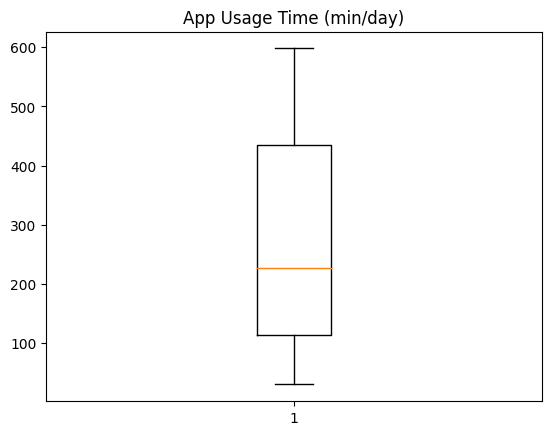

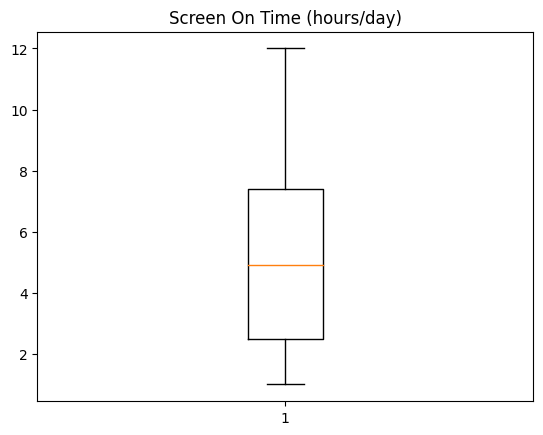

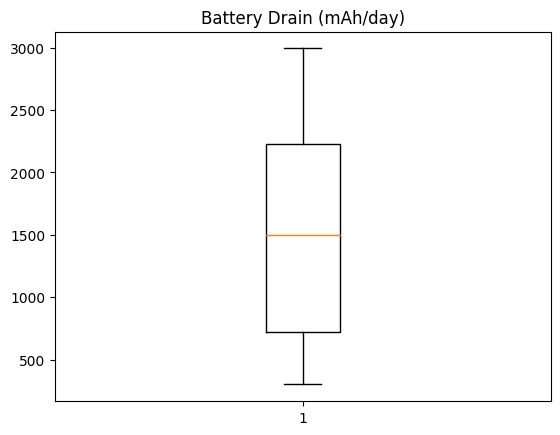

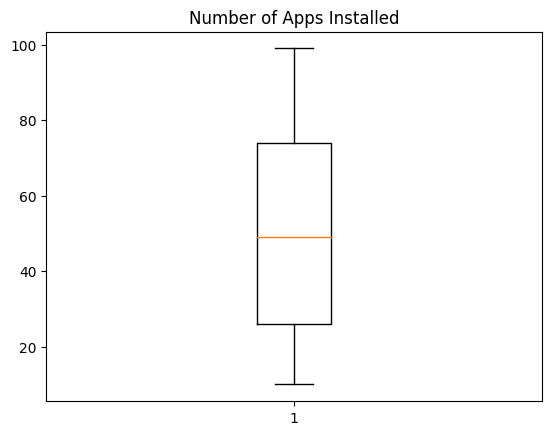

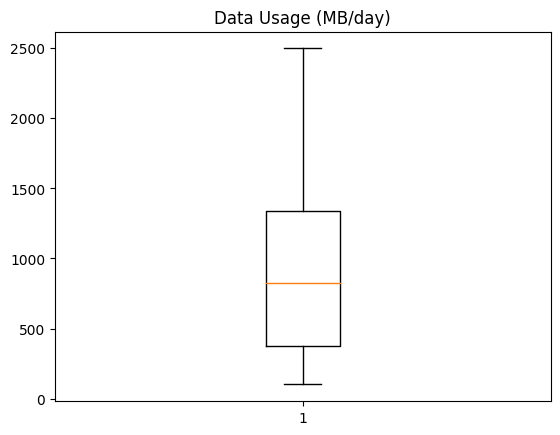

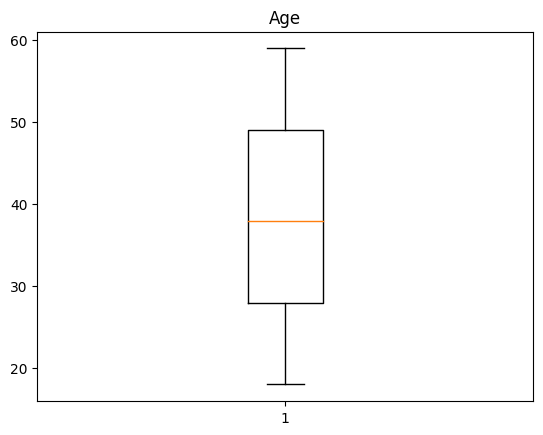

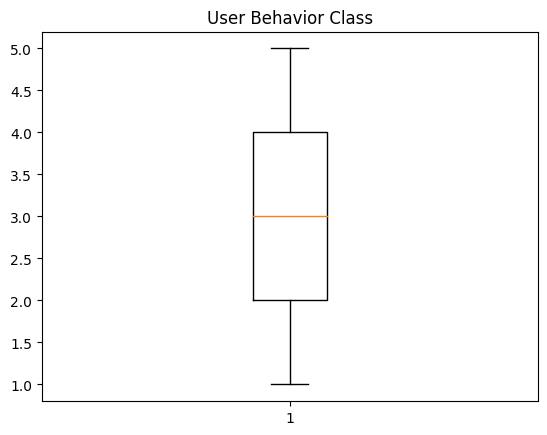

In [33]:
for i in numerical_features:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

#### No outlier is found

In [34]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

## BIVARIATE ANALYSIS

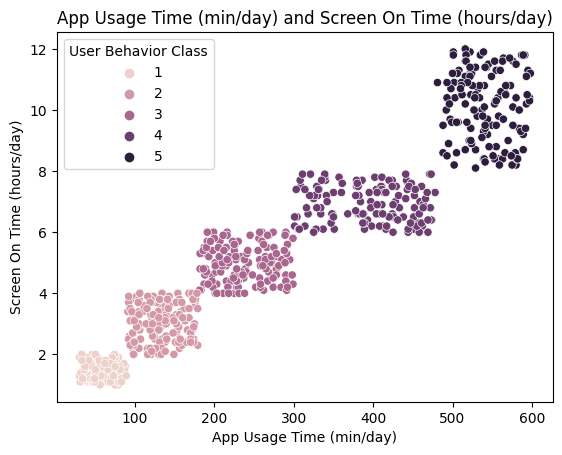

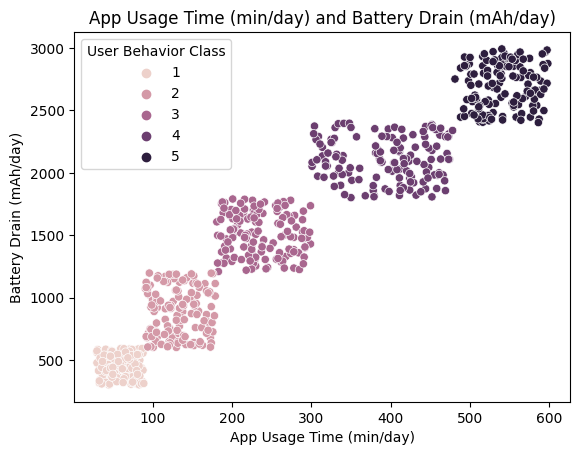

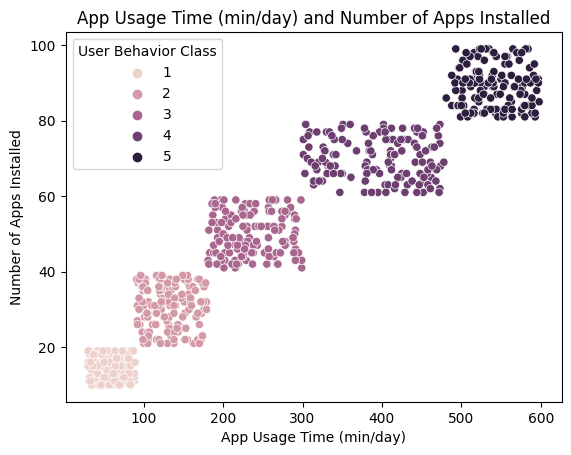

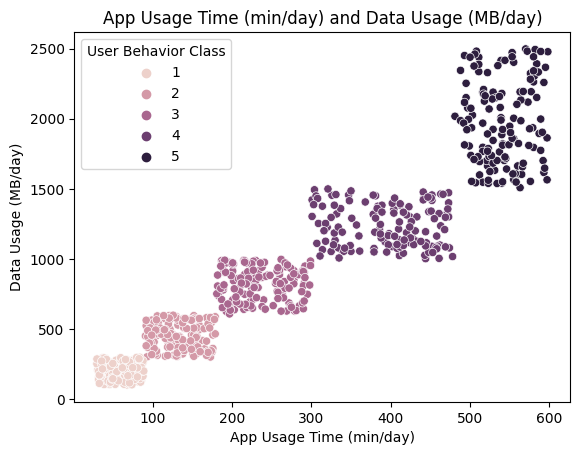

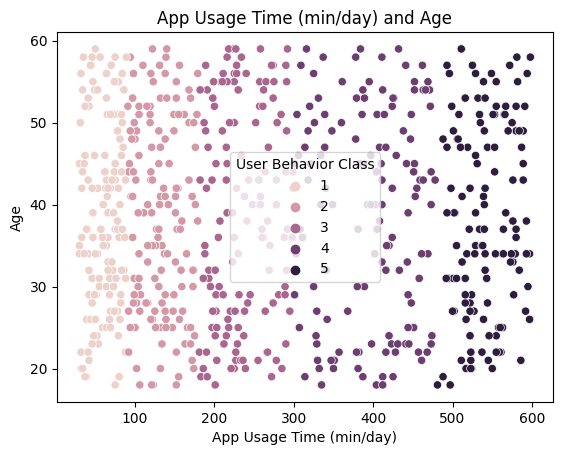

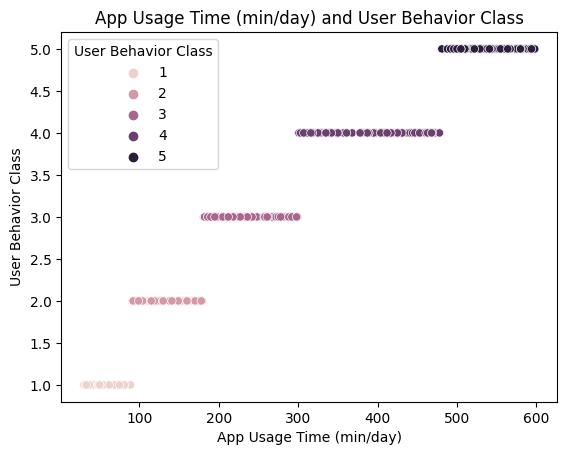

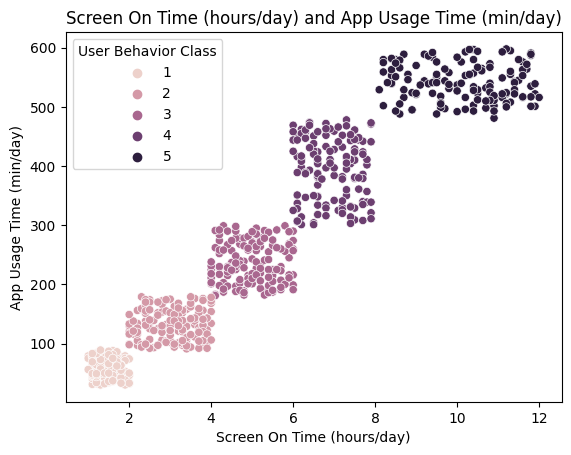

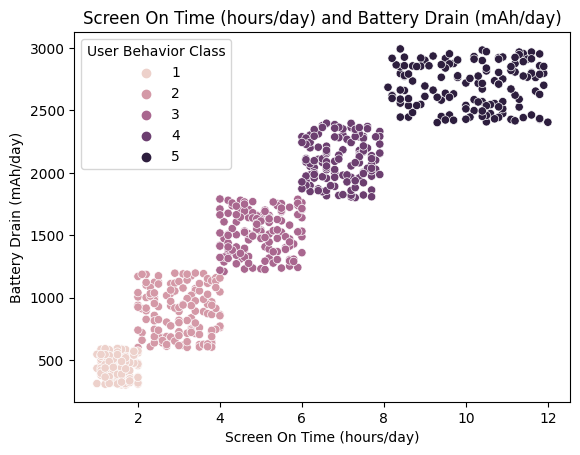

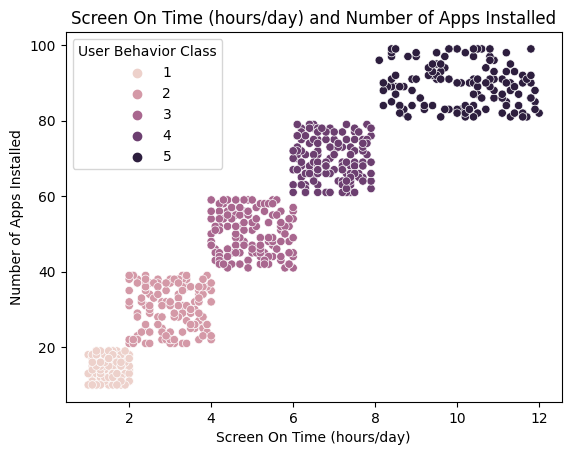

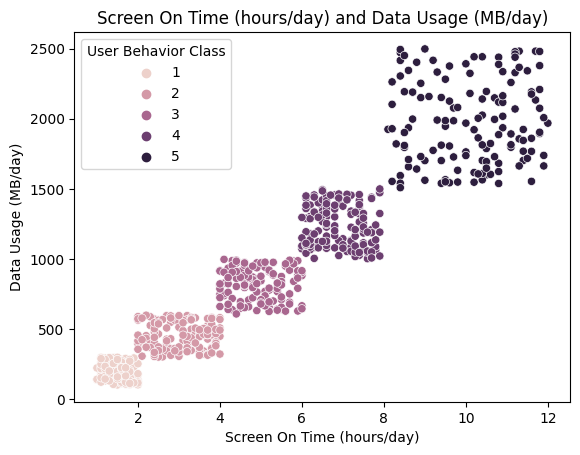

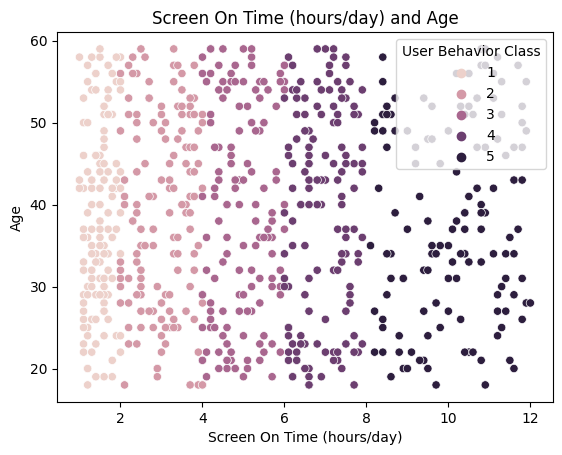

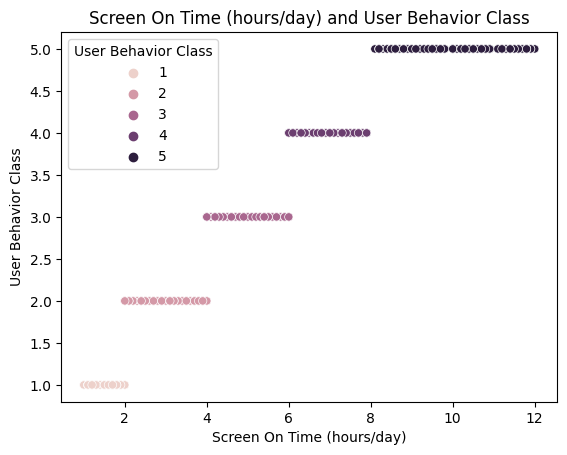

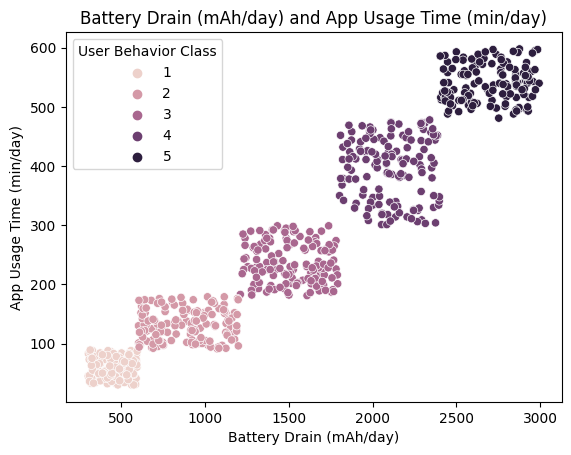

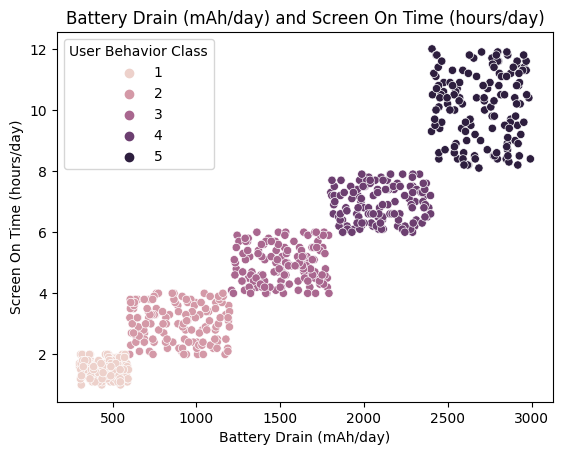

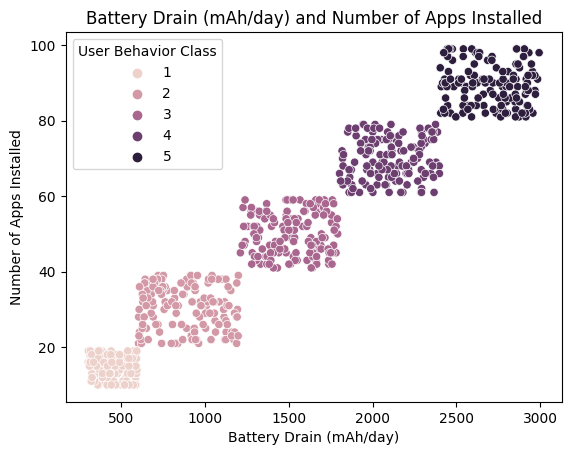

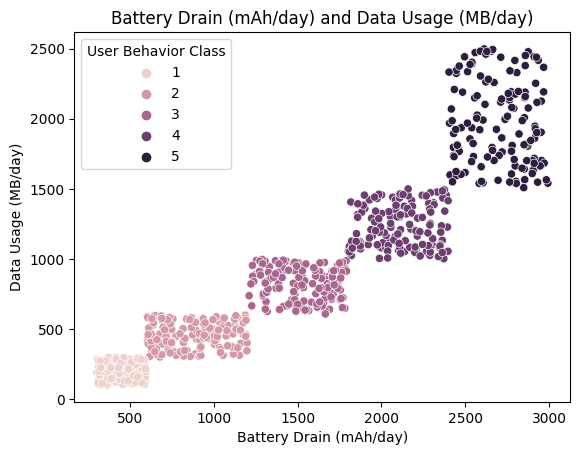

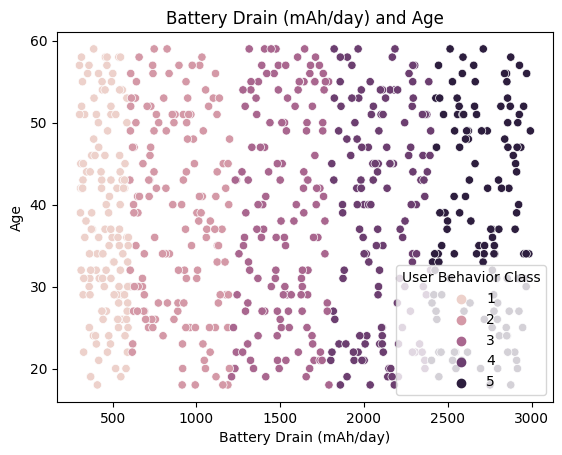

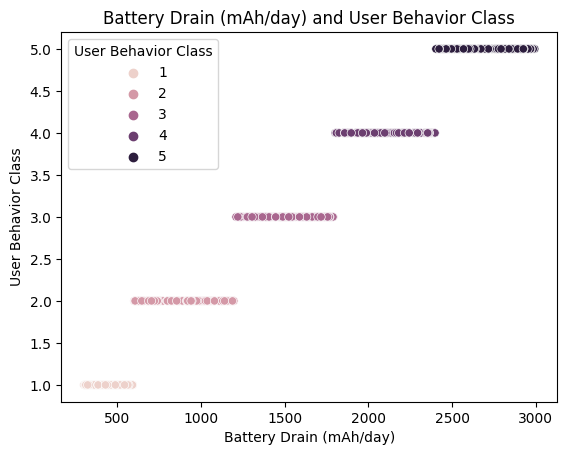

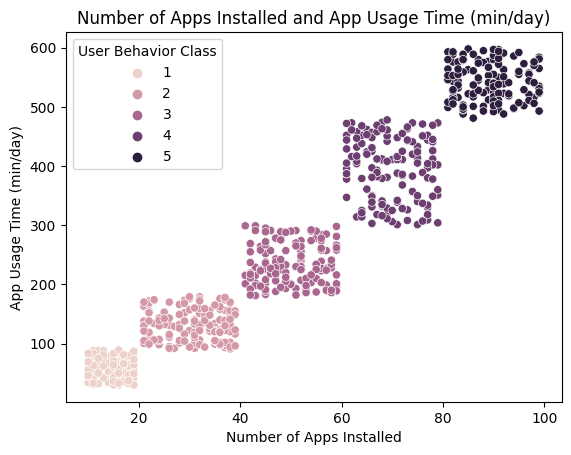

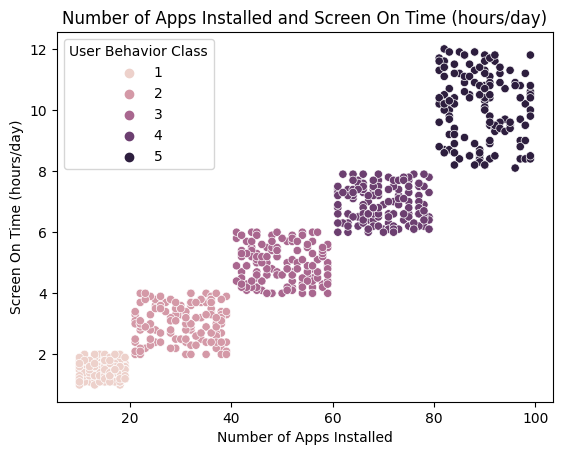

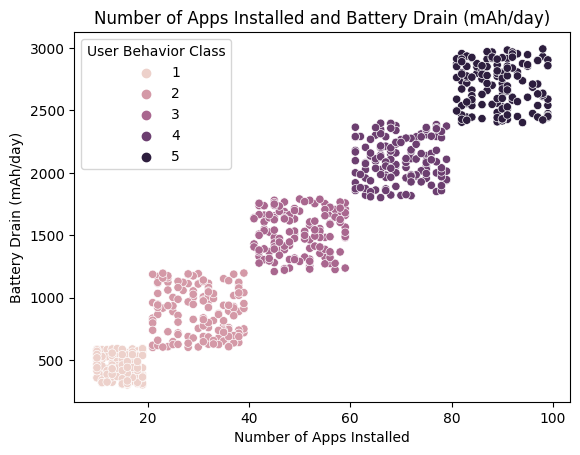

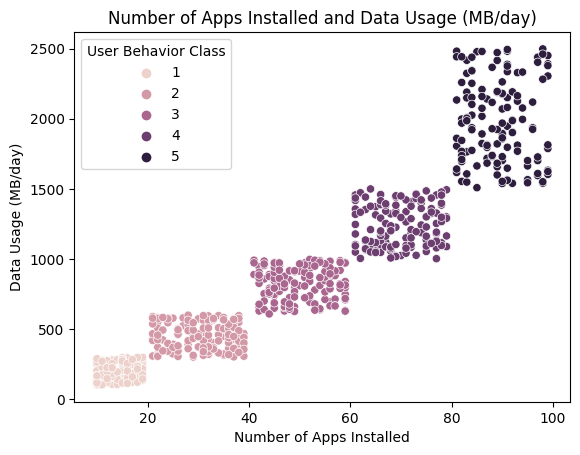

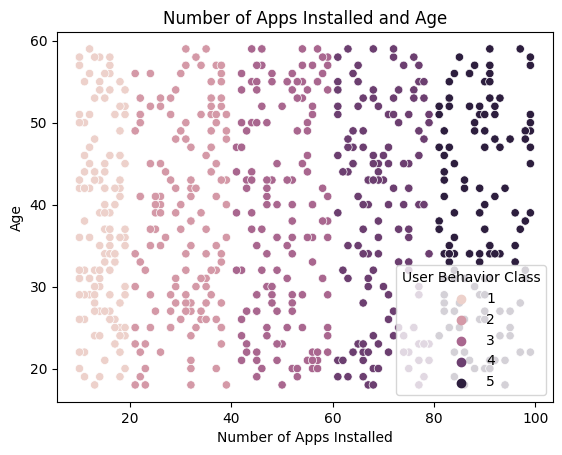

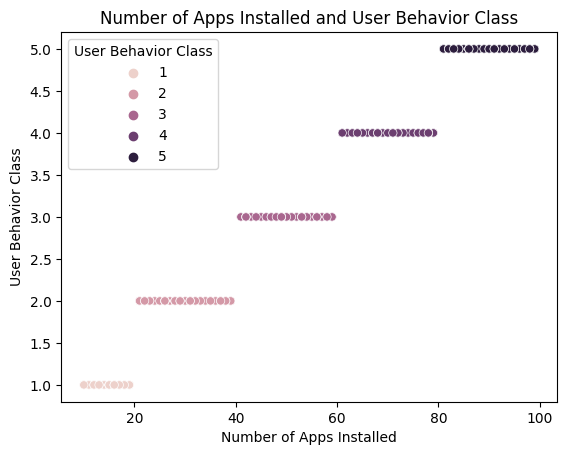

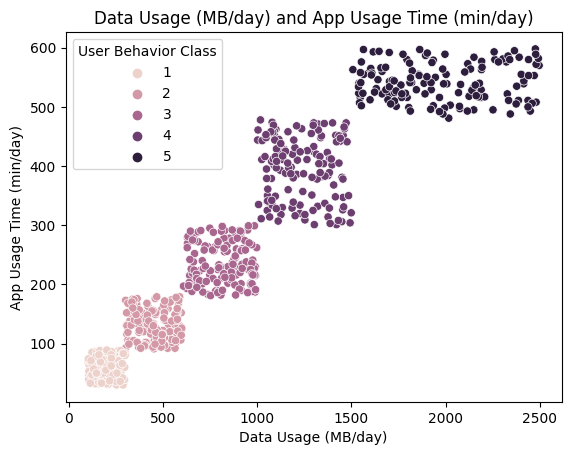

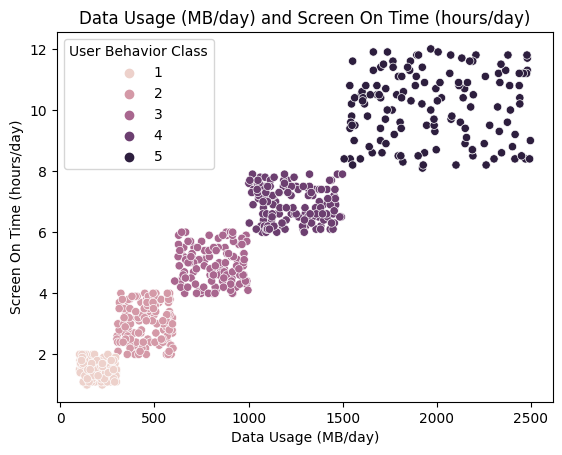

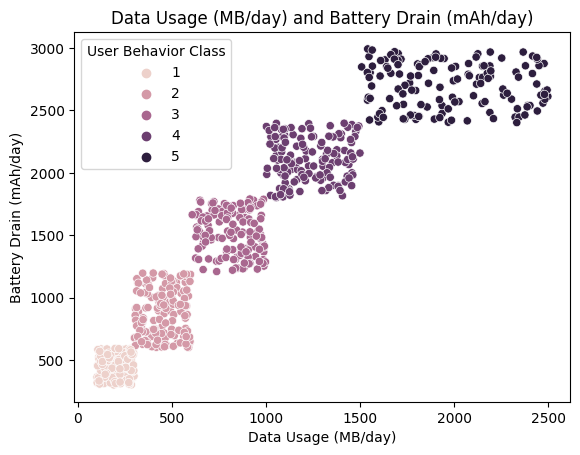

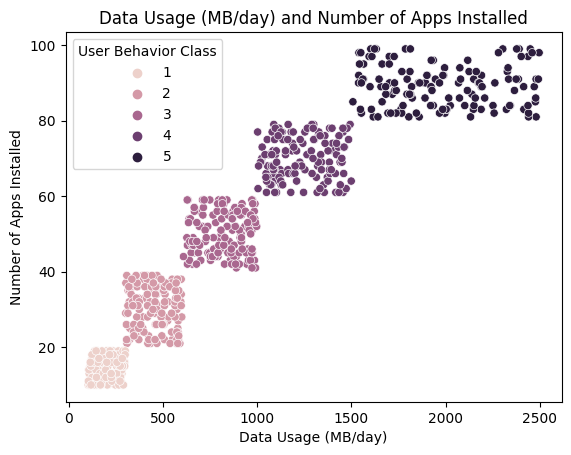

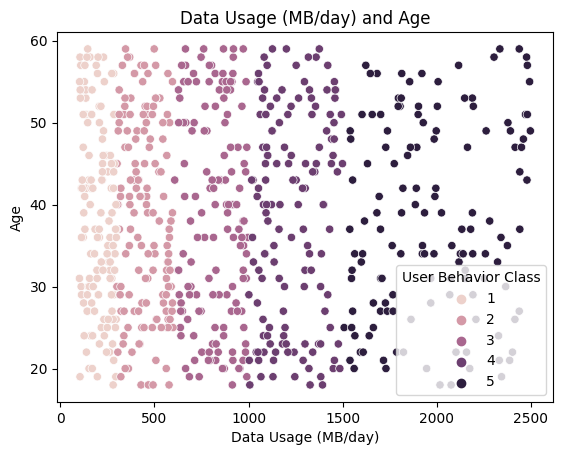

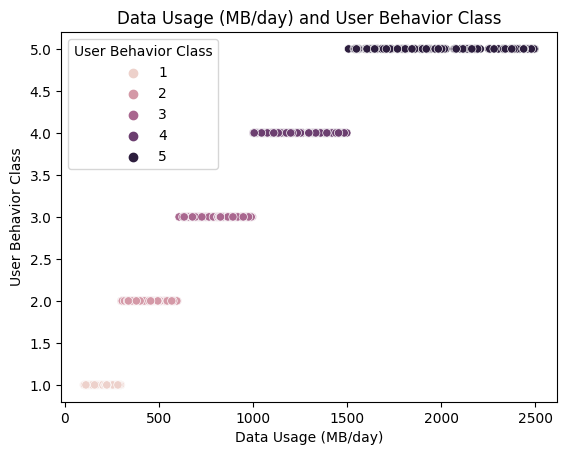

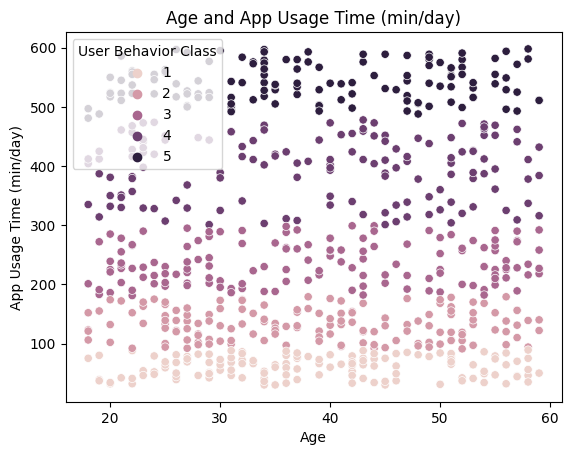

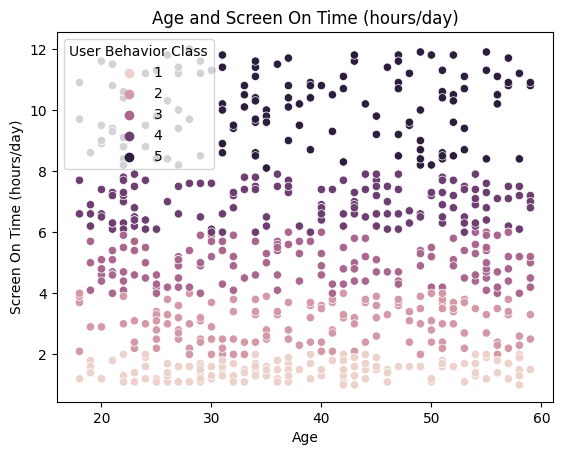

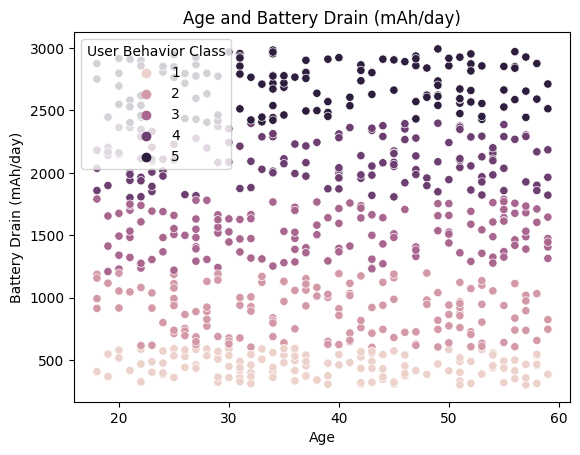

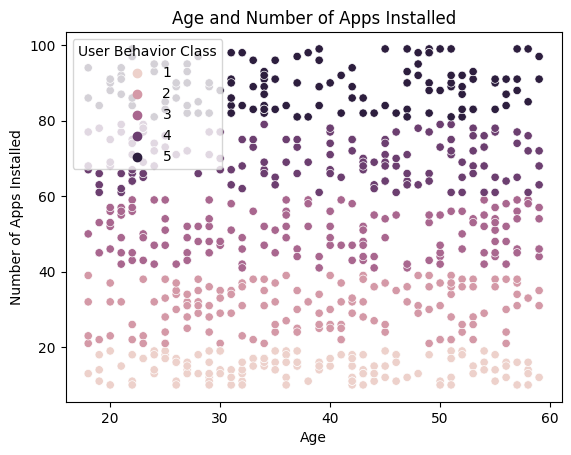

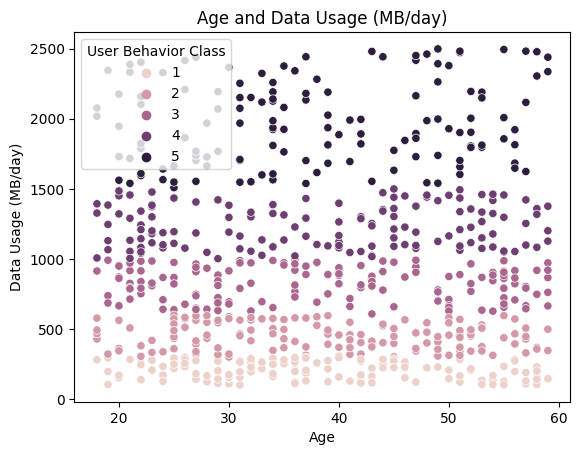

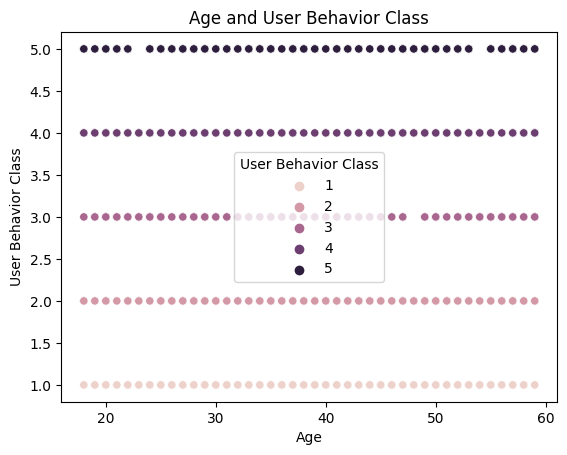

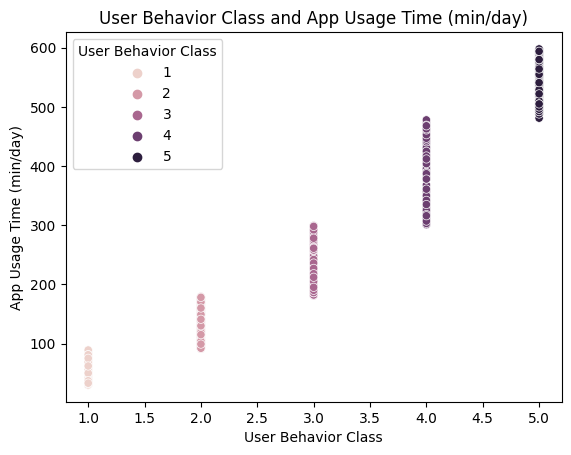

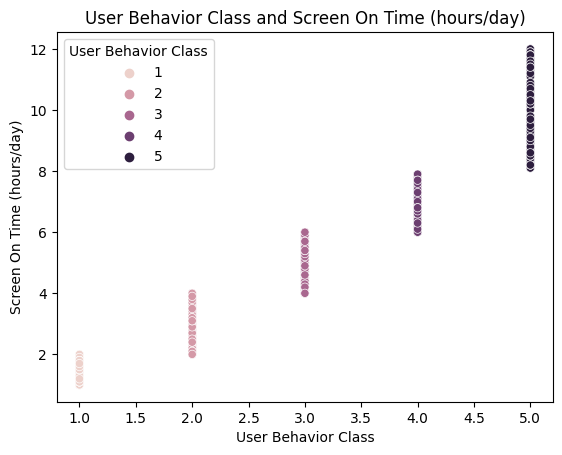

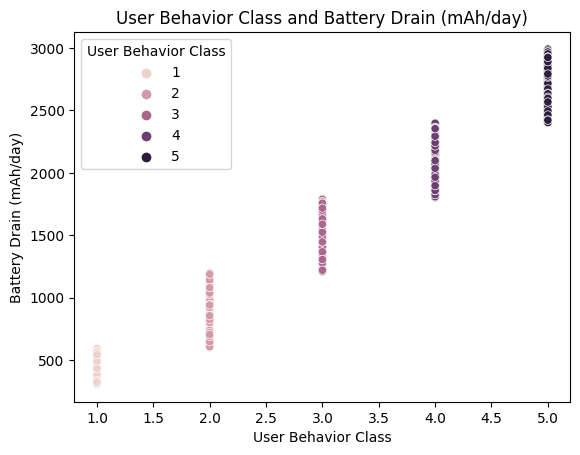

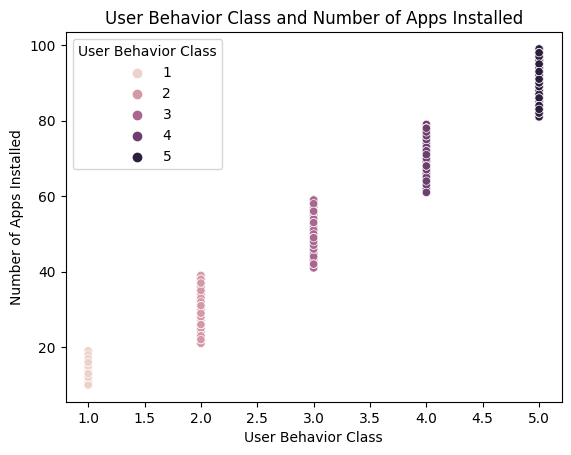

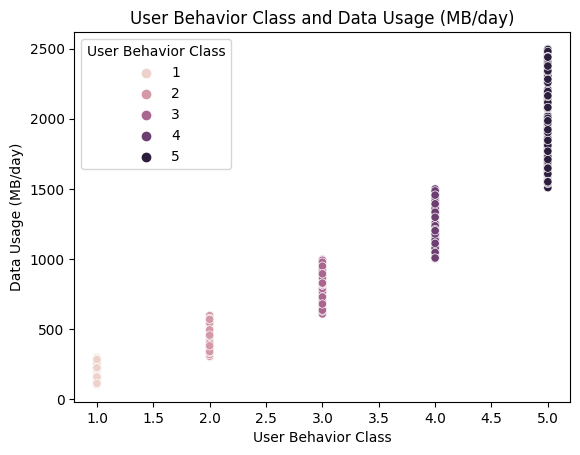

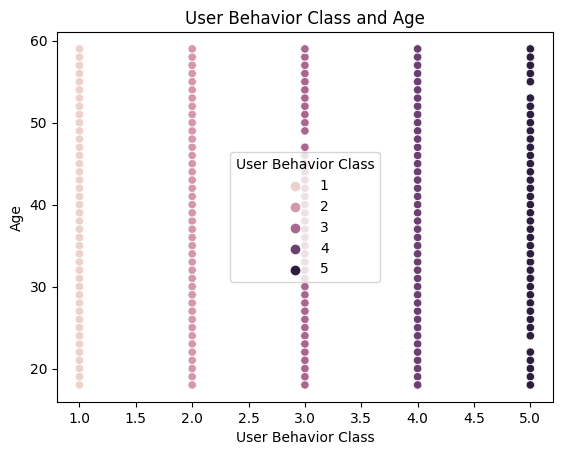

In [35]:
for i in numerical_features:
    for j in numerical_features:
        if i == j:
            continue
        else:
            sns.scatterplot(data = df,x = i,y = j,hue = 'User Behavior Class')
            plt.title(i +' ' + 'and' + ' '+j)
            plt.show()

#### There is postive relationship between some numerical varaible and the User Behavior Class, like when screen time increases User Behavior Class increases But there is no such relationship between Age and our target varaible

In [36]:
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

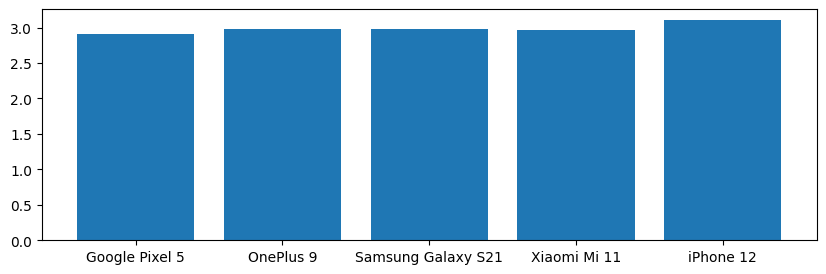

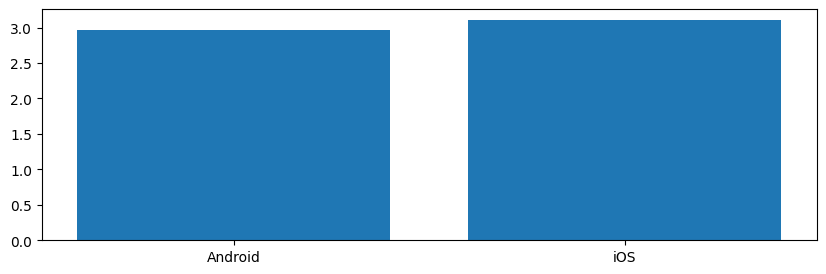

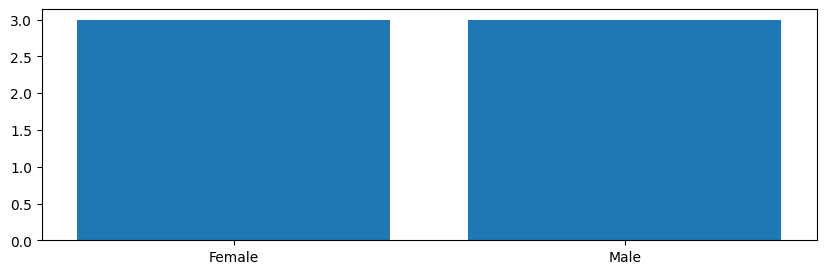

In [37]:
for i in categorical_features:
    plt.figure(figsize = (10,3))
    plt.bar(df.groupby(i)['User Behavior Class'].mean().index,df.groupby(i)['User Behavior Class'].mean())
    plt.show()

#### there is no relationship seen between categorical and our target varaible

## MULTIVARAIATE VARAIBLE

In [38]:
corr_matrix = df.corr(numeric_only = True)

In [39]:
corr_matrix.drop('User ID', axis = 'columns',inplace = True)

In [40]:
corr_matrix.drop('User ID',axis = 'index',inplace = True)

<Axes: >

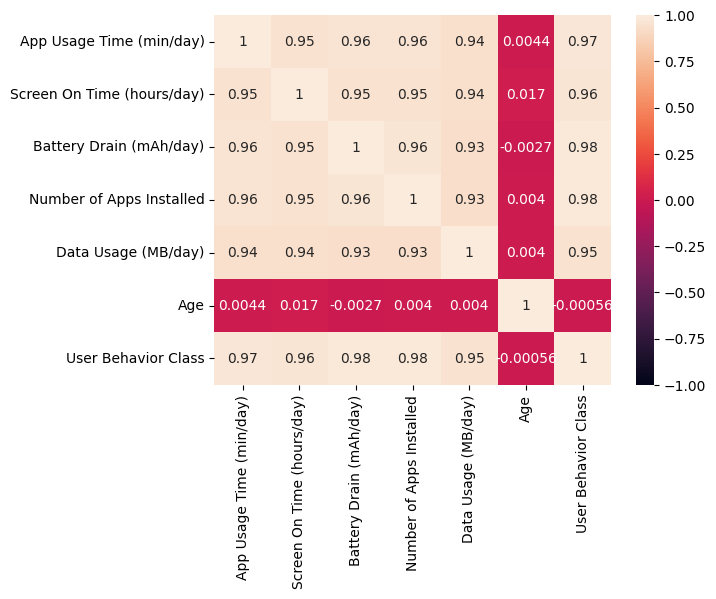

In [41]:
sns.heatmap(corr_matrix,vmin = -1,vmax = 1,annot = True)

## FEATURE ENCODING

In [42]:
encoded_device = pd.get_dummies(df['Device Model'],dtype = int,drop_first = True)

In [43]:
encoded_os = pd.get_dummies(df['Operating System'],dtype = int,drop_first = True)

In [44]:
encoded_gender = pd.get_dummies(df['Gender'],dtype = int,drop_first = True)

 #### The reason why i chose one hot encoding is our categorical varaibles are in less cardinality

In [45]:
list_df = [df,encoded_device,encoded_os,encoded_gender]

In [46]:
df = pd.concat(list_df,axis = 'columns')

In [47]:
df = df.drop(['User ID','Device Model','Operating System','Gender'],axis = 'columns')

In [48]:
df.head()

App Usage Time (min/day)  Screen On Time (hours/day)  \
0                       393                         6.4   
1                       268                         4.7   
2                       154                         4.0   
3                       239                         4.8   
4                       187                         4.3   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                     1872                        67                 1122   
1                     1331                        42                  944   
2                      761                        32                  322   
3                     1676                        56                  871   
4                     1367                        58                  988   

   Age  User Behavior Class  OnePlus 9  Samsung Galaxy S21  Xiaomi Mi 11  \
0   40                    4          0                   0             0   
1   47                    3          1                   0             0   
2   42                    2          0                   0             1   
3   20                    3          0                   0             0   
4   31                    3          0                   0             0   

   iPhone 12  iOS  Male  
0          0    0     1  
1          0    0     0  
2          0    0     1  
3          0    0     1  
4          1    1     0

## FEATURE SCALING

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [50]:
X = df.drop('User Behavior Class',axis = 'columns')
Y = df['User Behavior Class']

In [51]:
for i in X.columns:
    model = mms.fit(X[[i]])
    X[i] = model.transform(X[[i]])

 #### Reason for choosing MinMaxScaler is i wanted my data original distribution intact and there is no outlier was seen in the dataset 

In [52]:
Y.value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

#### Our targert varaible is balanced so explicit handelling is not required

## MODEL TRAINING


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 12,test_size=0.2)

In [55]:
y_test.shape

(140,)

In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score,f1_score

In [57]:
model_dict = {"DecisionTree ": DecisionTreeClassifier(),
              "RandomForestClassifier" : RandomForestClassifier(),
              "Gradient Boosting Classifier": GradientBoostingClassifier(),
              "LogisticRegression": LogisticRegression(multi_class= 'multinomial'),
              "SVC" : SVC(kernel = 'linear')}

In [58]:
accuracy_dict = {}
for (i,model) in model_dict.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_dict[i] = {'precision score' : precision_score(y_test,y_pred,average='micro'),
                       'recall_score' : recall_score(y_test,y_pred,average='micro'),
                       'accuracy_score': accuracy_score(y_test,y_pred),
                       'f1_score': f1_score(y_test,y_pred,average='micro')}

In [59]:
model_metrics = pd.DataFrame(accuracy_dict)
model_metrics

DecisionTree   RandomForestClassifier  \
precision score            1.0                     1.0   
recall_score               1.0                     1.0   
accuracy_score             1.0                     1.0   
f1_score                   1.0                     1.0   

                 Gradient Boosting Classifier  LogisticRegression  SVC  
precision score                           1.0            0.978571  1.0  
recall_score                              1.0            0.978571  1.0  
accuracy_score                            1.0            0.978571  1.0  
f1_score                                  1.0            0.978571  1.0

#### Models like DecisionTree ,RandomForestClassifier,Gradient Boosting Classifier,SVC are producing 100 percent accuracy so going with any one of these model will beneficial

